In [1]:
import pandas as pd
import numpy as np

# importing datetime
import datetime as dt

# importing math functions
import math as m

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

#profile report
from pandas_profiling import *


import re

# filtering warnings
import warnings
warnings.filterwarnings('ignore')

import waterfall_chart


In [2]:
# Importing Necessary tables
Customers=pd.read_csv(r'Python casestudy/CUSTOMERS.csv')
Sellers= pd.read_csv(r'Python casestudy/SELLERS.csv')
Products = pd.read_csv(r'Python casestudy/PRODUCTS.csv')
Orders = pd.read_csv(r'Python casestudy/ORDERS.csv')
Order_Items = pd.read_csv(r'Python casestudy/ORDER_ITEMS.csv')
Order_Payments = pd.read_csv(r'Python casestudy/ORDER_PAYMENTS.csv')
Order_Review_Ratings = pd.read_csv(r'Python casestudy/ORDER_REVIEW_RATINGS.csv')
Geo_Location = pd.read_csv(r'Python casestudy/GEO_LOCATION.csv')

In [3]:
Customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh


In [4]:
Customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [5]:
Sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh


In [6]:
Products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
Orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [8]:
Order_Items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [9]:
Order_Payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
Order_Review_Ratings.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26


In [11]:
Geo_Location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


# 1. Perform Detailed exploratory analysis
# a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…) 

In [12]:
# Total Revenue
print('Total Revenue: ',round(Order_Items.price.sum(),2))

# Total Quantity
print('Total Quantity: ', Order_Items.shape[0])

# Total Products
print('Total Products: ',Products.product_id.nunique())

# Total Categories
print('Total categories: ',Products.product_category_name.nunique())

# Total Sellers
print('Total Sellers: ',Sellers.seller_id.nunique())

# Total Locations
print('Total Locations: ',Geo_Location.geolocation_zip_code_prefix.nunique())

# Total payment methods
print('Total payment methods: ',Order_Payments.payment_type.nunique())

Total Revenue:  13591643.7
Total Quantity:  112650
Total Products:  32951
Total categories:  71
Total Sellers:  3095
Total Locations:  19015
Total payment methods:  5


# b. Understanding how many new customers acquired every month


In [13]:
Orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,3/9/2017 9:54,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00


In [14]:
Orders['order_purchase_timestamp']=pd.to_datetime(Orders.order_purchase_timestamp,format='%m/%d/%Y %H:%M')
Orders['Year-Month']=Orders.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x,format='%Y-%b'))
Cust_order=pd.merge(left=Customers,right=Orders,on='customer_id',how='inner')
Cust_monthly=Cust_order.loc[:,['customer_unique_id','Year-Month']]
Cust_monthly=Cust_monthly.drop_duplicates('customer_unique_id')
#Cust_monthly
New_cust_monthly=pd.pivot_table(data=Cust_monthly,values='customer_unique_id',index='Year-Month',aggfunc='count')
print('The number of new customers obtained monthly are as follows:')
New_cust_monthly

The number of new customers obtained monthly are as follows:


,customer_unique_id
Year-Month,
2016-Oct,315
2016-Sep,4
2017-Apr,2318
2017-Aug,4144
2017-Dec,5491
2017-Feb,1727
2017-Jan,749
2017-Jul,3864
2017-Jun,3103


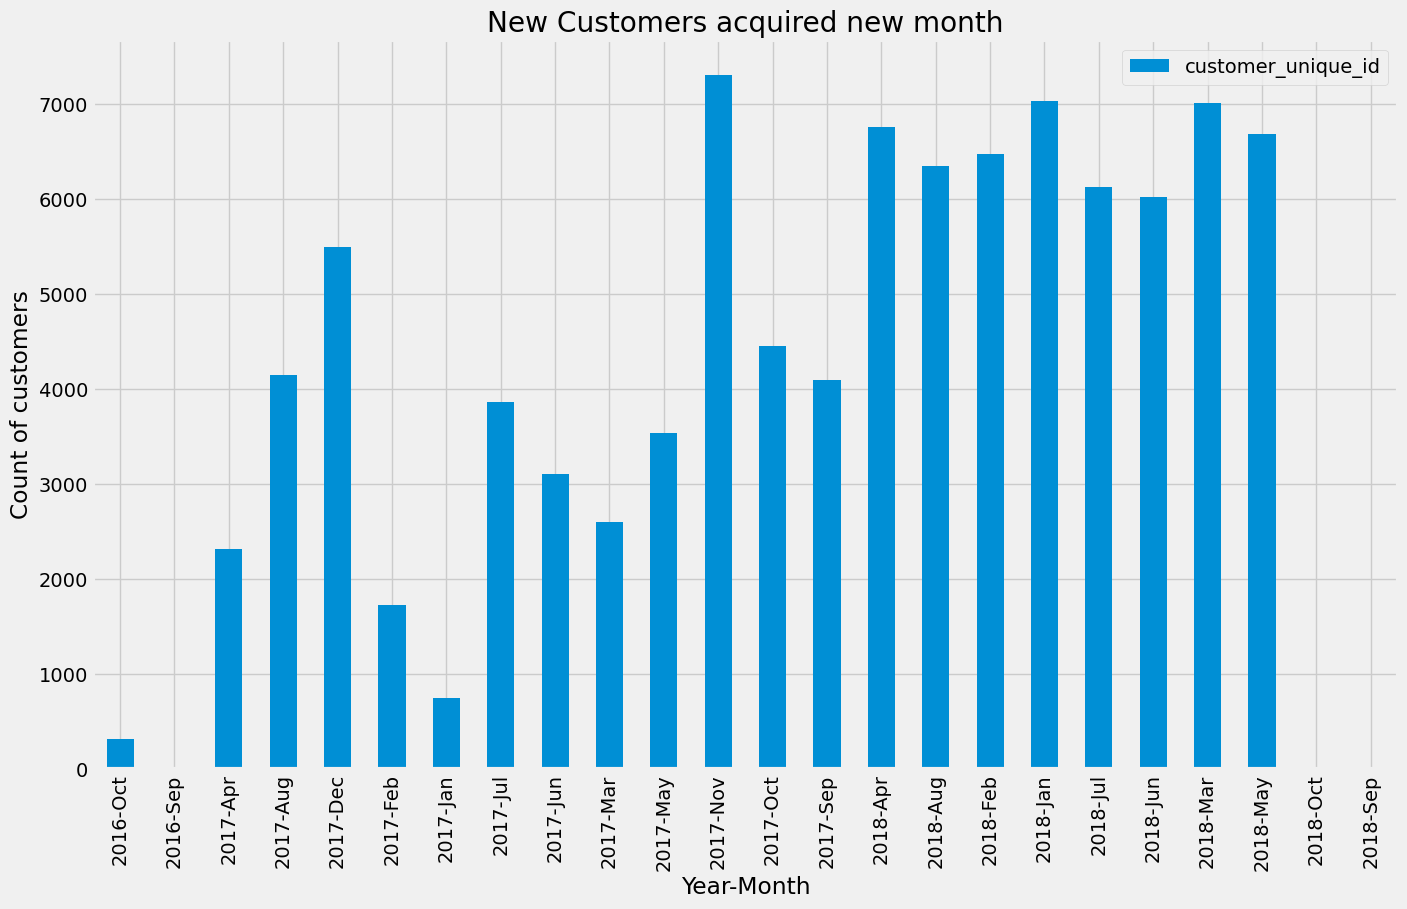

In [15]:
New_cust_monthly.plot(kind='bar',figsize=[15,9],legend=True)
plt.title('New Customers acquired new month')
plt.xlabel('Year-Month')
plt.ylabel('Count of customers')
plt.show()

# c. Understand the retention of customers on month on month basis

In [15]:
month_count=pd.pivot_table(data=Cust_order,values='customer_unique_id',index='Year-Month',aggfunc='count')
retention_cust=pd.merge(left=New_cust_monthly,right=month_count,how='inner',on='Year-Month')
retention_cust['retained_cust_count']=retention_cust.customer_unique_id_y - retention_cust.customer_unique_id_x

In [16]:
retention_cust=retention_cust.reset_index()

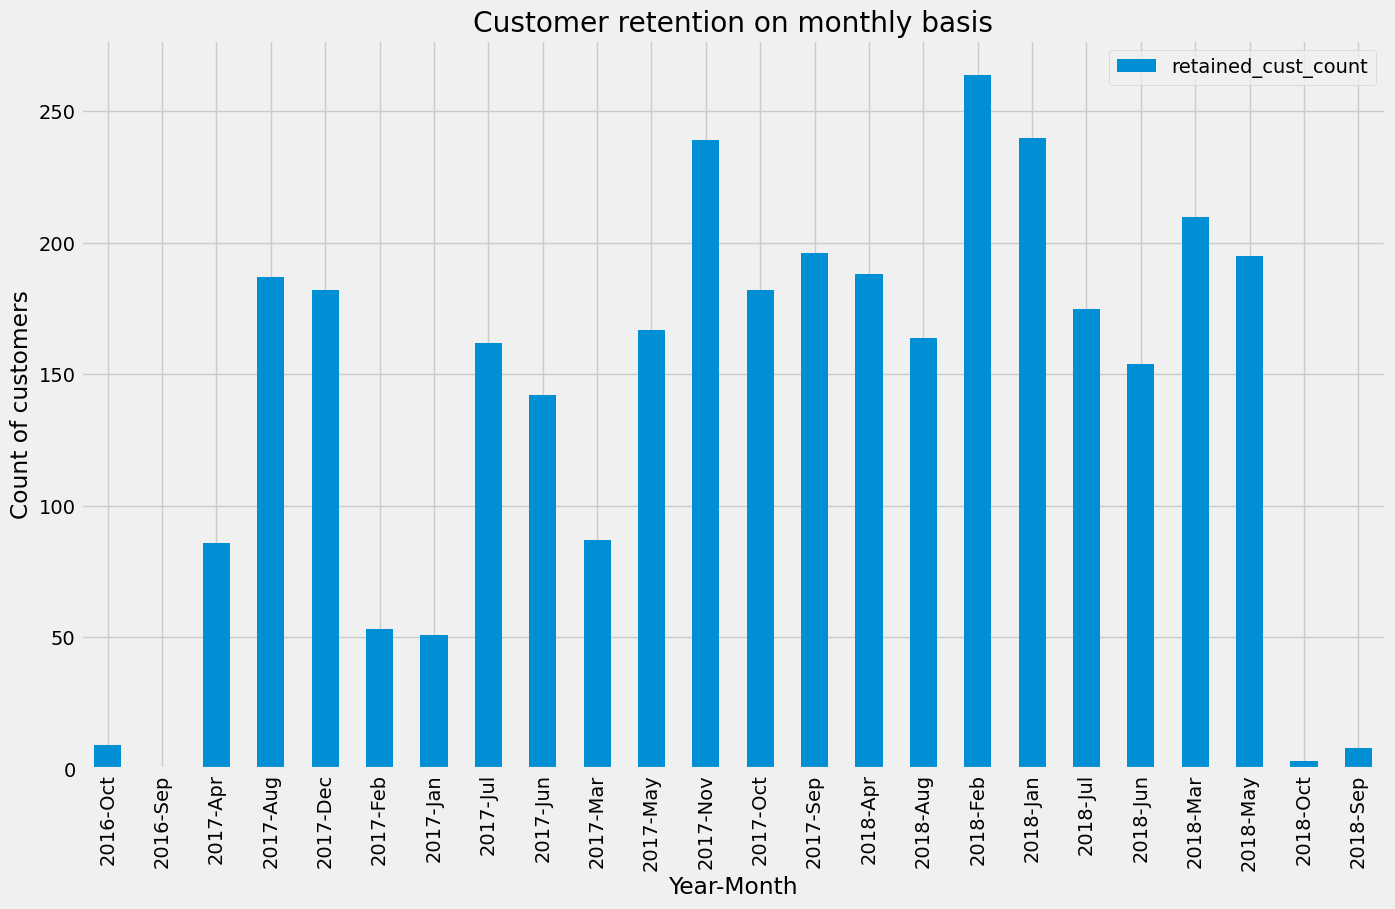

In [18]:
retention_cust.plot(kind='bar',x='Year-Month',y='retained_cust_count',figsize=[15,9],legend=True)
plt.title('Customer retention on monthly basis')
plt.xlabel('Year-Month')
plt.ylabel('Count of customers')
plt.show()

# d. How the revenues from existing/new customers on month on month basis

In [17]:
Order_detail=pd.merge(left=Orders,right=Order_Items,how='inner',on='order_id')
Month=Order_detail['Year-Month'].str.split('-',expand=True)
Month[1]

0         Oct
1         Jul
2         Aug
3         Nov
4         Feb
         ... 
112645    Feb
112646    Aug
112647    Jan
112648    Jan
112649    Mar
Name: 1, Length: 112650, dtype: object

In [18]:
Order_detail['Month']=Month[1]
Month_rev=pd.pivot_table(data=Order_detail,values=['price','freight_value'],index=['Month','customer_id']).reset_index().sort_values('Month')
Month_rev['Net Profit']= Month_rev.price + Month_rev.freight_value
Month_rev=Month_rev.set_index('Month')
Month_rev=Month_rev.reset_index()
Month_rev

,Month,customer_id,freight_value,price,Net Profit
0,Apr,000379cdec625522490c315e70c7a9fb,14.01,93.00,107.01
1,Apr,a8e5ab9fae7e21ef7e843734f55602ca,14.11,48.99,63.10
2,Apr,a8ed087e25b26fb64cbb99033eb243a7,16.05,34.90,50.95
3,Apr,a8edb87d848c12b4bb341d5f7641a942,19.27,199.00,218.27
4,Apr,a8efde73814dc81ff114f0980fb6386f,16.14,179.99,196.13
...,...,...,...,...,...
98661,Sep,5144672f3d4c43d179dc389a64de306a,15.15,56.99,72.14
98662,Sep,5160a7d2b93c50245ae21cbc016e4e1a,24.34,499.90,524.24
98663,Sep,5166ee187c5b2e4a0c97532601a02d93,8.11,20.30,28.41
98664,Sep,507f7a9eafd9f8c8fff398275e71b336,16.12,50.90,67.02


In [19]:
pd.options.display.float_format='{:.2f}'.format
sort_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Rev_Month=Month_rev.groupby('Month')['Net Profit'].sum().reset_index()
Rev_Month.index=pd.CategoricalIndex(Rev_Month['Month'],categories=sort_order,ordered=True)
Rev_Month=Rev_Month.sort_index().drop(columns='Month').reset_index()

In [20]:
Rev_Month

,Month,Net Profit
0,Jan,1130382.75
1,Feb,1160236.94
2,Mar,1450947.60
3,Apr,1436335.62
4,May,1567142.31
5,Jun,1398620.79
6,Jul,1494298.48
7,Aug,1532889.29
8,Sep,644996.71
9,Oct,745132.06


In [21]:
pd.options.display.float_format='{:.2f}'.format
sort_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Rev_Month=Month_rev.groupby('Month')['Net Profit'].sum().reset_index()
Rev_Month.index=pd.CategoricalIndex(Rev_Month['Month'],categories=sort_order,ordered=True)
Rev_Month=Rev_Month.sort_index().drop(columns='Month').reset_index()

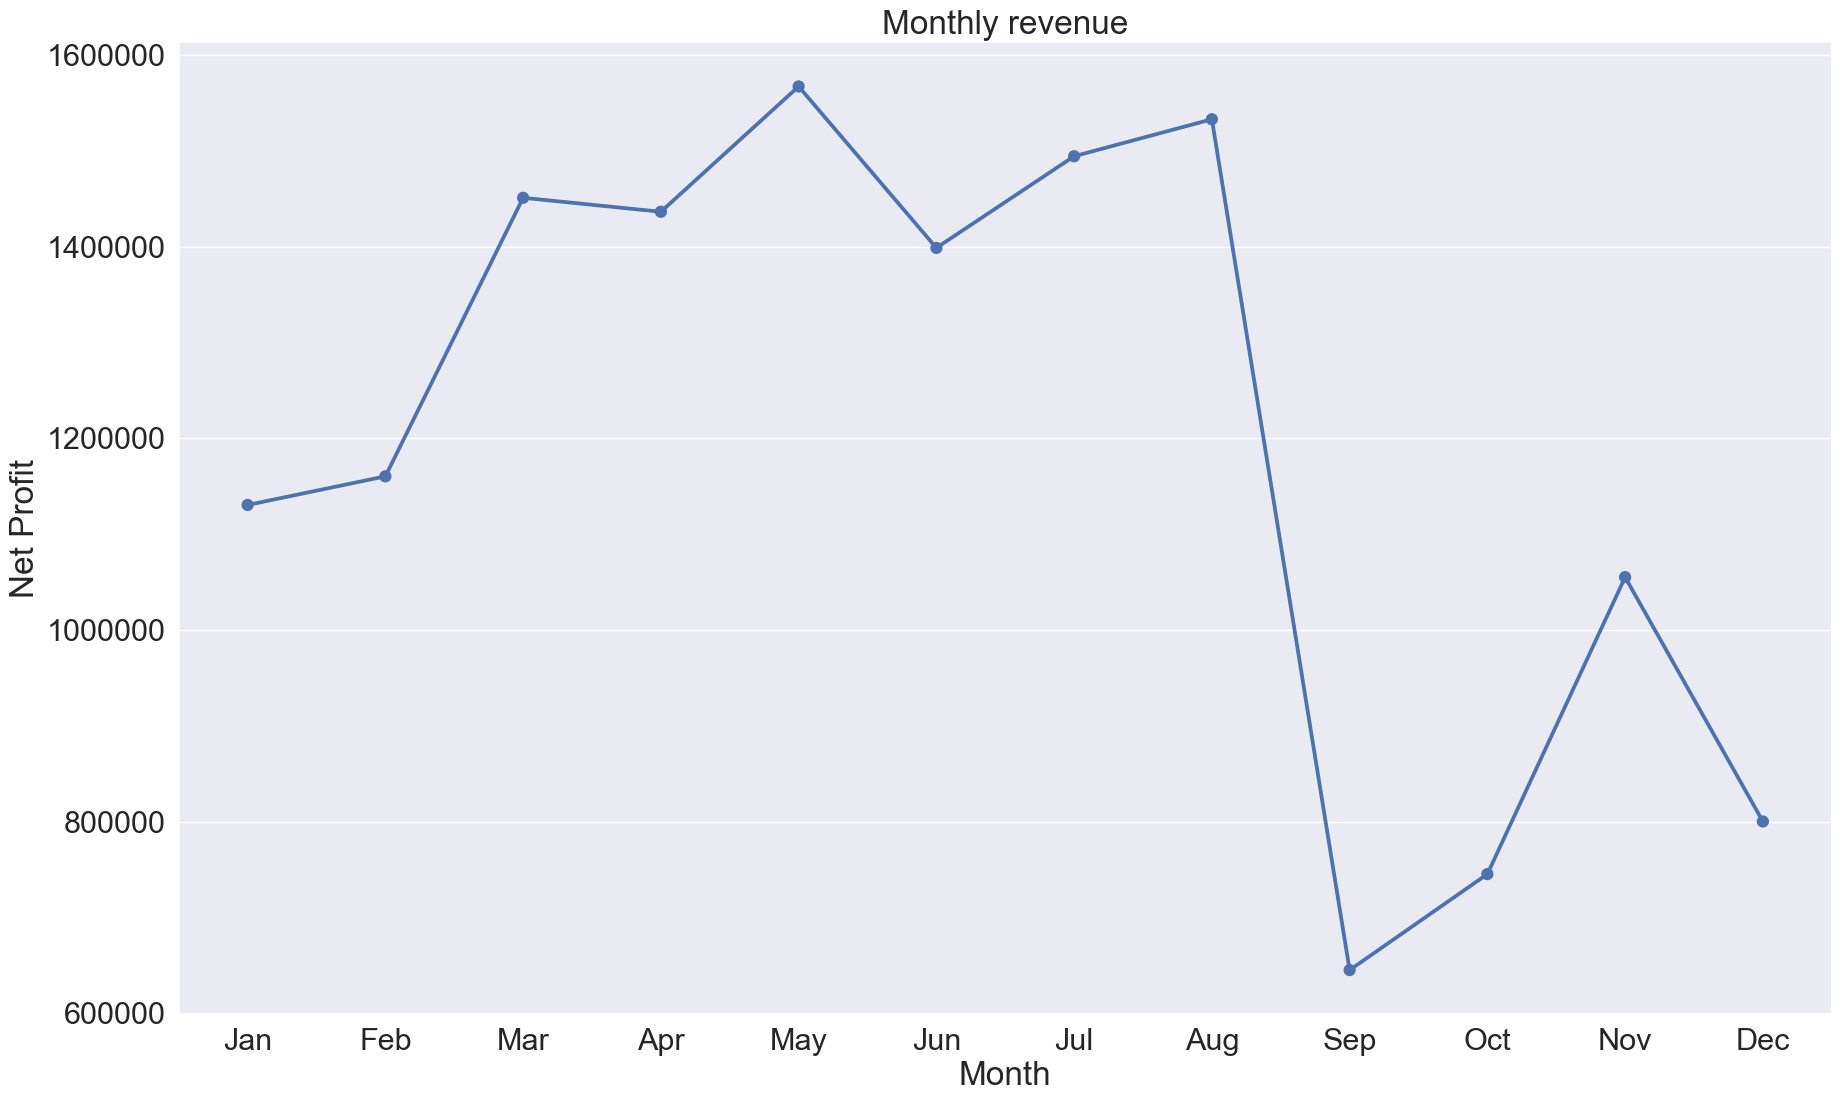

In [40]:
plt.rcParams.update({'figure.figsize':[19,12]})
plt.style.use('ggplot')
sns.set(font_scale=2)
sns.pointplot(Rev_Month['Month'],Rev_Month['Net Profit'])
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.title('Monthly revenue')
plt.show()

#  e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…


In [24]:
# seasonality of sales,quantity by category
Order_det_prod=pd.merge(left=Order_detail,right=Products,on='product_id')
prod_cat_sales=Order_det_prod.groupby(Order_det_prod.product_category_name).agg({'product_id':'count','price':'sum'}).reset_index().rename(columns={'product_id':'Quantity','price':'Sales'})
prod_cat_sales

,product_category_name,Quantity,Sales
0,Agro_Industry_And_Commerce,212,72530.47
1,Air_Conditioning,297,55024.96
2,Art,209,24202.64
3,Arts_And_Craftmanship,24,1814.01
4,Audio,364,50688.50
...,...,...,...
66,Stationery,2517,230943.23
67,Tablets_Printing_Image,83,7528.41
68,Telephony,4545,323667.53
69,Toys,4117,483946.60


In [25]:
# trends/seasonality of sales, quantity by location
Order_det_loc=pd.merge(left=Order_det_prod,right=Customers,on='customer_id')
Location_Qty_sales=Order_det_loc.groupby('customer_city').agg({'product_id':'count','price':'sum'}).reset_index().rename(columns={'product_id':'Quantity','price':'Sales'})
Location_Qty_sales

,customer_city,Quantity,Sales
0,Aadityana,18,1608.73
1,Aambaliyasan,2,169.80
2,Aantaliya,98,13149.78
3,Aarambhada,51,5106.24
4,Abiramam,1,74.90
...,...,...,...
4105,Zamin Uthukuli,2,107.99
4106,Ziauddin Pur,157,17574.58
4107,Zira,4,434.65
4108,Zirakpur,4,543.78


In [26]:
# trends/seasonality of sales, quantity by month, week, day, time
Order_det_prod['day']=Order_det_prod.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x, '%A'))
Order_det_prod['week']=Order_det_prod.order_purchase_timestamp.dt.isocalendar().week
Order_det_prod['time']=Order_det_prod.order_purchase_timestamp.dt.hour
Month_sales=pd.pivot_table(data=Order_det_prod,index=['Month','day','week','time'],values=['product_id','price'],aggfunc={'product_id':'count','price':'sum'}).rename(columns={'product_id':'Quantity','price':'Sales'})
Month_sales=Month_sales.reset_index()

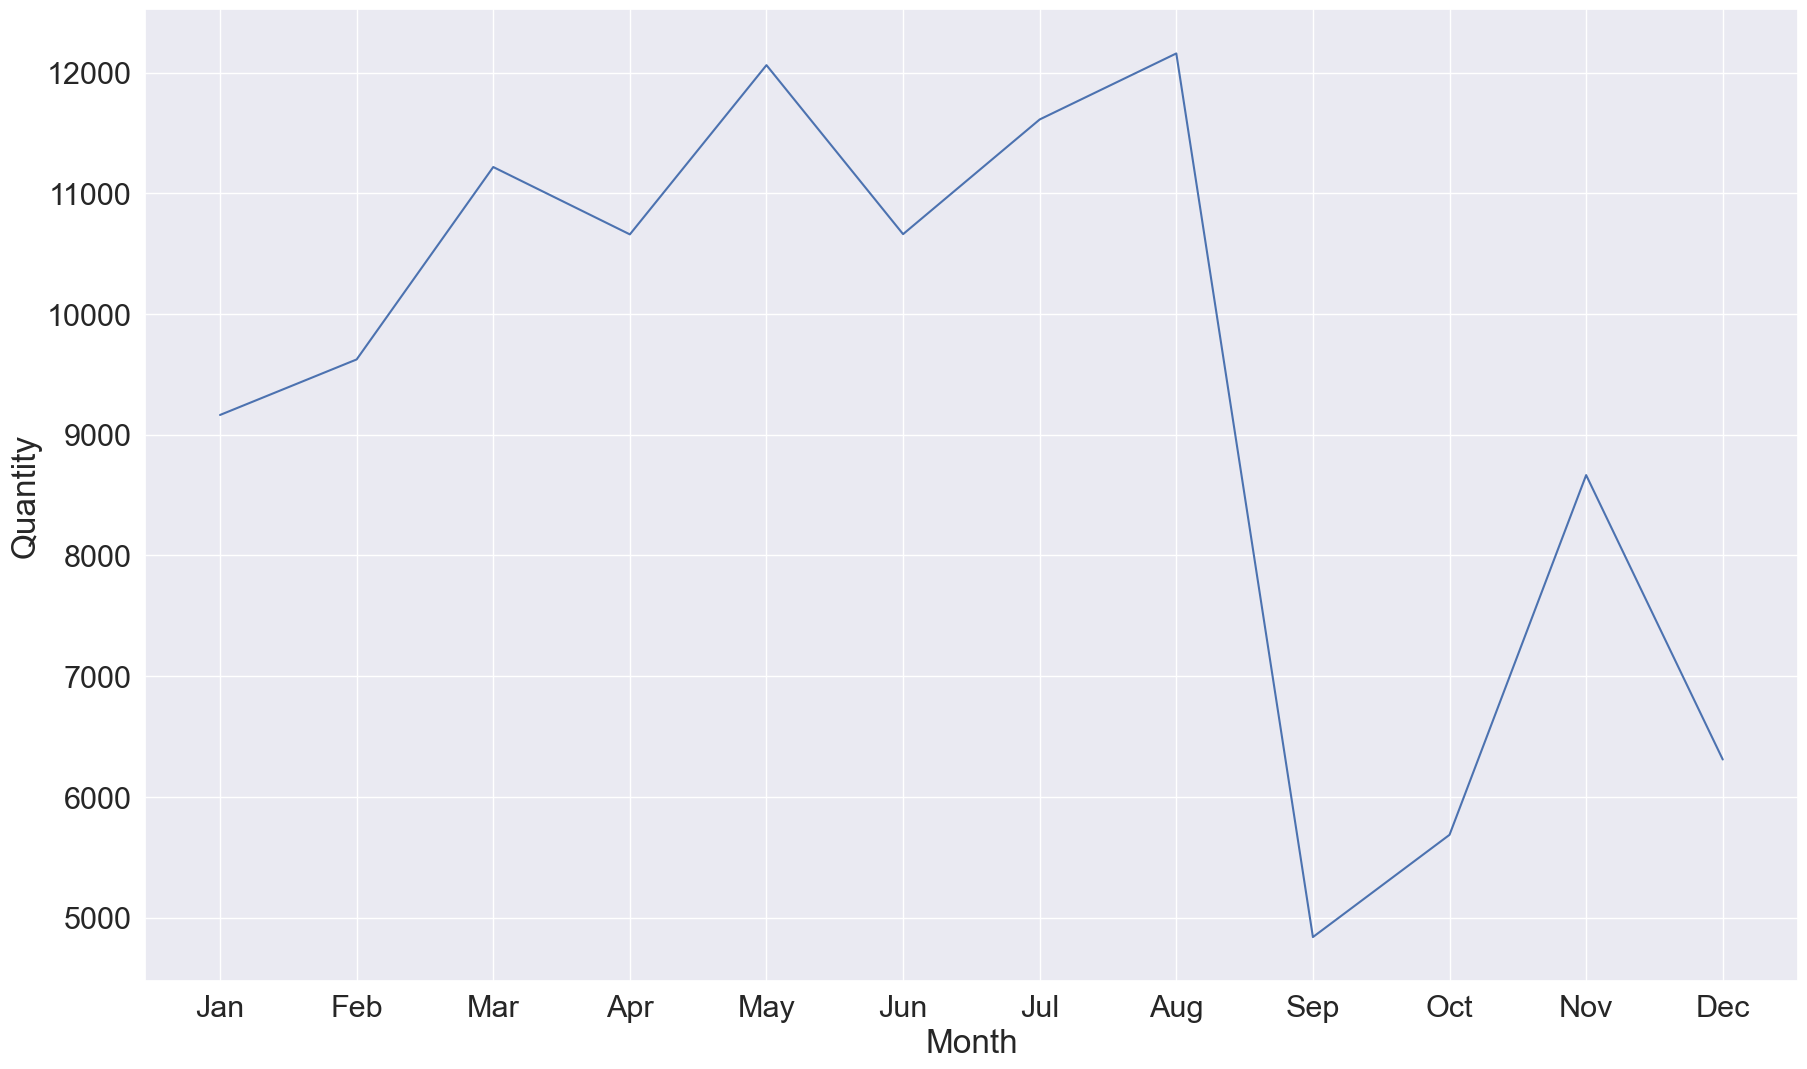

In [50]:
Qty_per_month=Month_sales.groupby('Month')['Quantity'].sum().reset_index()
sort_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Qty_per_month.index=pd.CategoricalIndex(Qty_per_month['Month'],categories=sort_order,ordered=True)
Qty_per_month_dta=Qty_per_month.sort_index().drop(columns='Month').reset_index()
sns.lineplot(Qty_per_month_dta['Month'],Qty_per_month_dta['Quantity'])
plt.show()


# f. Popular Products by month, seller, state, category.

In [26]:
Seller_order_item=pd.merge(Order_Items,Sellers,on='seller_id')
Seller_Order=pd.merge(Seller_order_item,Orders,how='inner',on='order_id')
Seller_Order['Month']=Seller_Order.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x,'%B'))

In [27]:
Seller_popular_prod=pd.merge(Seller_Order,Products,how='inner',on='product_id')
Seller_popular_product=pd.pivot_table(Seller_popular_prod,index=['seller_id','seller_state','product_category_name'],values='product_id',aggfunc='count')
Seller_popular_product

product_id
seller_id                        seller_state   product_category_name                      
0015a82c2db000af6aaaf3ae2ecb0532 Andhra Pradesh Small_Appliances                          3
001cca7ae9ae17fb1caed9dfb1094831 Delhi          Construction_Tools_Construction          27
                                                Garden_Tools                            212
001e6ad469a905060d959994f1b41e4f Andhra Pradesh Sports_Leisure                            1
002100f778ceb8431b7a1020ff7ab48f Andhra Pradesh Furniture_Decor                          55
...                                                                                     ...
ffff564a4f9085cd26170f4732393726 Andhra Pradesh Construction_Tools_Construction           1
                                                Electronics                               2
                                                Food                                      2
                                                Housewares                                2
                                                Market_Place                              1

[6226 rows x 1 columns]

In [28]:
Monthly_popular_prod=pd.pivot_table(Order_det_prod,values='product_id',index=['Month','product_category_name'],aggfunc='count')
Monthly_popular_prod

product_id
Month product_category_name                 
Apr   Agro_Industry_And_Commerce          12
      Air_Conditioning                    39
      Art                                 27
      Arts_And_Craftmanship                1
      Audio                               42
...                                      ...
Sep   Stationery                          77
      Tablets_Printing_Image               3
      Telephony                          178
      Toys                               297
      Watches_Gifts                      268

[797 rows x 1 columns]

In [29]:
# seller product based on state
State_popular=pd.pivot_table(Seller_popular_prod,values='product_id',index=['seller_state','product_category_name'],aggfunc='count')
State_popular

product_id
seller_state   product_category_name                              
Andhra Pradesh Agro_Industry_And_Commerce                      175
               Air_Conditioning                                147
               Art                                             187
               Arts_And_Craftmanship                            17
               Audio                                           272
...                                                            ...
West Bengal    Kitchen_Dining_Laundry_Garden_Furniture           1
               Pet_Shop                                          4
               Small_Appliances                                  8
               Sports_Leisure                                    5
               Toys                                              4

[595 rows x 1 columns]

# g. Popular categories by state, month

In [30]:
cat_month=Order_det_prod.groupby(['Month','product_category_name']).agg({'product_category_name':'count'}).rename(columns={'product_category_name':'count'}).reset_index()
cat_month= cat_month.sort_values(by=['Month','count']).drop_duplicates(subset='Month' ,keep='last')
cat_month

,Month,product_category_name,count
7,Apr,Bed_Bath_Table,1020
111,Aug,Health_Beauty,1209
144,Dec,Bed_Bath_Table,552
213,Feb,Computers_Accessories,1087
270,Jan,Bed_Bath_Table,896
339,Jul,Bed_Bath_Table,1203
407,Jun,Bed_Bath_Table,1155
473,Mar,Bed_Bath_Table,1087
541,May,Bed_Bath_Table,1116
608,Nov,Bed_Bath_Table,975


# h. List top 10 most expensive products sorted by price


In [159]:
Expensive_prod=pd.pivot_table(Order_det_prod,values='price',index=['product_id','product_category_name'],aggfunc='sum').reset_index().sort_values('price',ascending=False)
Expensive_prod=Expensive_prod.drop_duplicates(subset='product_id')
Expensive_prod=Expensive_prod.head(10)
Expensive_prod

,product_id,product_category_name,price
23641,bb50f2e236e5eea0100680137654686c,Health_Beauty,63885.00
13808,6cdd53843498f92890544667809f1595,Health_Beauty,54730.20
27102,d6160fb7873f184099d9bc95e30376af,Computers,48899.34
26533,d1c427060a0f73f6b889a5c7c61f2ac4,Computers_Accessories,47214.51
19387,99a4788cb24856965c36a24e339b6058,Bed_Bath_Table,43025.56
7902,3dd2a17168ec895c781a9191c1e95ad7,Computers_Accessories,41082.60
4901,25c38557cf793876c5abdd5931f922db,Baby,38907.32
12125,5f504b3a1c75b73d6151be81eb05bdc9,Cool_Stuff,37733.90
10662,53b36df67ebb7c41585e8d54d6772e08,Watches_Gifts,37683.42
21716,aca2eb7d00ea1a7b8ebd4e68314663af,Furniture_Decor,37608.90


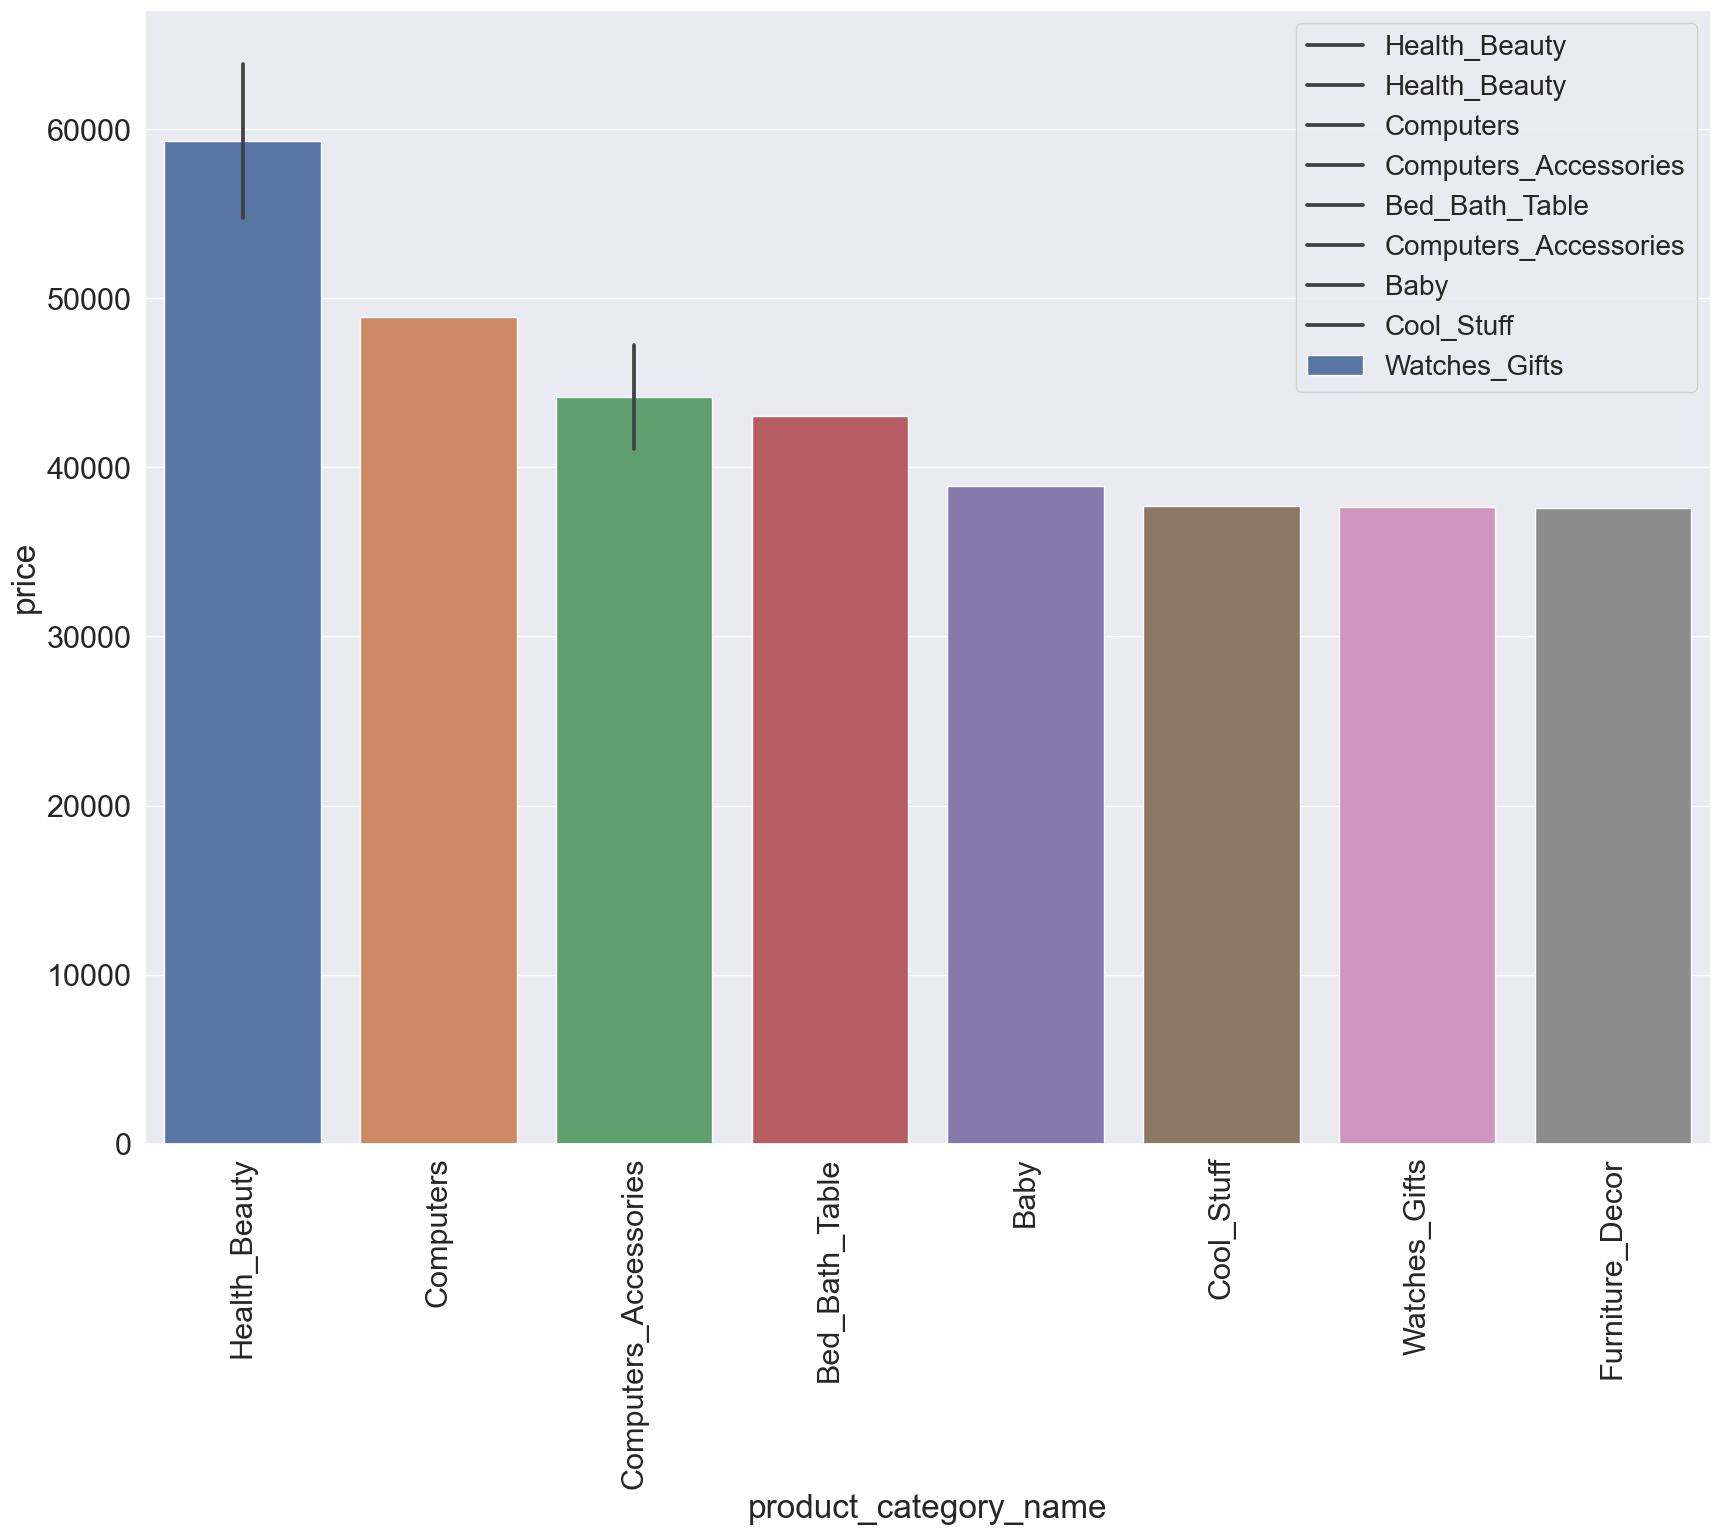

In [180]:
plt.figure(figsize=[18,14])
sns.set(font_scale=2)
sns.barplot(Expensive_prod['product_category_name'],Expensive_prod['price'])
plt.xticks(rotation=90)
plt.legend(Expensive_prod['product_category_name'],fontsize=20)
plt.show()

# 2. Performing Customers/sellers Segmentation
# a. Divide the customers into groups based on the revenue generated 

In [32]:
Order_Items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,55.99,8.72


In [33]:
Cust_order

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year-Month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,2017-May
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,2018-Jan
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,2018-May
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,2018-Mar
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,2018-Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,4/13/2018 20:06,4/25/2018 0:00,2018-Apr
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,4/11/2018 18:54,4/20/2018 0:00,2018-Apr
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,5/9/2018 19:03,5/2/2018 0:00,2018-Apr
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,11/16/2017 19:58,12/5/2017 0:00,2017-Nov


In [34]:
cust_orders=pd.merge(left=Cust_order,right=Order_Items,on='order_id')
cust_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year-Month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,2017-May,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,2018-Jan,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,2018-May,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,2018-Mar,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,3/27/2018 16:31,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,2018-Jul,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,7/31/2018 10:10,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,4/13/2018 20:06,4/25/2018 0:00,2018-Apr,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,4/12/2018 16:08,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,4/11/2018 18:54,4/20/2018 0:00,2018-Apr,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,4/10/2018 8:35,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,5/9/2018 19:03,5/2/2018 0:00,2018-Apr,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,4/12/2018 20:30,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,11/16/2017 19:58,12/5/2017 0:00,2017-Nov,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,11/9/2017 21:15,689.00,22.07


In [35]:
cust_orders['Net price']=cust_orders['price']+cust_orders['freight_value']

In [36]:
cust_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year-Month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Net price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,2017-May,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,2018-Jan,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,2018-May,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,2018-Mar,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,3/27/2018 16:31,149.94,23.36,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,2018-Jul,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,7/31/2018 10:10,230.00,22.25,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,4/13/2018 20:06,4/25/2018 0:00,2018-Apr,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,4/12/2018 16:08,74.90,13.88,88.78
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,4/11/2018 18:54,4/20/2018 0:00,2018-Apr,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,4/10/2018 8:35,114.90,14.16,129.06
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,5/9/2018 19:03,5/2/2018 0:00,2018-Apr,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,4/12/2018 20:30,37.00,19.04,56.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,11/16/2017 19:58,12/5/2017 0:00,2017-Nov,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,11/9/2017 21:15,689.00,22.07,711.07


In [37]:
cust_rev=cust_orders.groupby(by='customer_id')[['Net price']].sum().reset_index()
cust_rev

,customer_id,Net price
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01
...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,91.91
98662,fffecc9f79fd8c764f843e9951b11341,81.36
98663,fffeda5b6d849fbd39689bb92087f431,63.13
98664,ffff42319e9b2d713724ae527742af25,214.13


In [38]:
cust_rev['Net price'].max()

13664.08

In [39]:
cust_rev['price_segment']=np.where(((cust_rev['Net price']>0)&(cust_rev['Net price']<5000)),'0-5000',np.where(((cust_rev['Net price']>5000)&(cust_rev['Net price']<10000)),'5001-10000','10001-14000'))

In [40]:
cust_rev.sort_values('Net price',ascending=False)

,customer_id,Net price,price_segment
8475,1617b1357756262bfa56ab541c47bc16,13664.08,10001-14000
91284,ec5b2ba62e574342386871631fafd3fc,7274.88,5001-10000
76948,c6e2731c5b391845f6800c97401a43a9,6929.31,5001-10000
94398,f48d464a0baaea338cb25f816991ab1f,6922.21,5001-10000
24603,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66,5001-10000
...,...,...,...
81496,d2c63ad286e3ca9dd69218008d61ff81,11.62,0-5000
1727,046f890135acc703faff4c1fc0c2d73c,11.56,0-5000
54747,8e4bd65db637116b6b68109e4df21b84,10.89,0-5000
9383,184e8e8e48937145eb96c721ef1f0747,10.07,0-5000


In [41]:
cust_rev.set_index('price_segment',inplace=True)

In [42]:
cust_rev

,customer_id,Net price
price_segment,,
0-5000,00012a2ce6f8dcda20d059ce98491703,114.74
0-5000,000161a058600d5901f007fab4c27140,67.41
0-5000,0001fd6190edaaf884bcaf3d49edf079,195.42
0-5000,0002414f95344307404f0ace7a26f1d5,179.35
0-5000,000379cdec625522490c315e70c7a9fb,107.01
...,...,...
0-5000,fffcb937e9dd47a13f05ecb8290f4d3e,91.91
0-5000,fffecc9f79fd8c764f843e9951b11341,81.36
0-5000,fffeda5b6d849fbd39689bb92087f431,63.13


# b. Divide the sellers into groups based on the revenue generated

In [43]:
Seller_segment=pd.pivot_table(Seller_Order,index='seller_id',values=['price','freight_value'],aggfunc='sum')
Seller_segment['Net price']=Seller_segment['price']+Seller_segment['freight_value']
Seller_segment

,freight_value,price,Net price
seller_id,,,
0015a82c2db000af6aaaf3ae2ecb0532,63.06,2685.00,2748.06
001cca7ae9ae17fb1caed9dfb1094831,8854.14,25080.03,33934.17
001e6ad469a905060d959994f1b41e4f,17.94,250.00,267.94
002100f778ceb8431b7a1020ff7ab48f,793.66,1234.50,2028.16
003554e2dce176b5555353e4f3555ac8,19.38,120.00,139.38
...,...,...,...
ffcfefa19b08742c5d315f2791395ee5,9.62,69.90,79.52
ffdd9f82b9a447f6f8d4b91554cc7dd3,727.46,2101.20,2828.66
ffeee66ac5d5a62fe688b9d26f83f534,419.69,1839.86,2259.55


In [44]:
Seller_segment['seller price segment']=pd.cut(Seller_segment['Net price'],bins=np.arange(0,250001,50000),labels=['0-50000','50001-100000','100001-150000','150001-200000','200001-250000'])

In [45]:
Seller_segment.sort_values('Net price',ascending=False)

,freight_value,price,Net price,seller price segment
seller_id,,,,
4869f7a5dfa277a7dca6462dcf3b52b2,20168.07,229472.63,249640.70,200001-250000
7c67e1448b00f6e969d365cea6b010ab,51612.55,187923.89,239536.44,200001-250000
53243585a1d6dc2643021fd1853d8905,13080.63,222776.05,235856.68,200001-250000
4a3ca9315b744ce9f8e9374361493884,35067.04,200472.92,235539.96,200001-250000
fa1c13f2614d7b5c4749cbc52fecda94,10042.70,194042.03,204084.73,200001-250000
...,...,...,...,...
702835e4b785b67a084280efca355756,10.96,7.60,18.56,0-50000
4965a7002cca77301c82d3f91b82e1a9,7.87,8.49,16.36,0-50000
1fa2d3def6adfa70e58c276bb64fe5bb,9.00,6.90,15.90,0-50000


# 3. Cross-Selling (Which products are selling together)


In [46]:
Cross_purchase=Order_det_prod.loc[:,['customer_id','order_id','order_purchase_timestamp','product_category_name']]
Cross_purchase=Cross_purchase[Cross_purchase.duplicated('order_id',keep=False)]
Cross_purchase

,customer_id,order_id,order_purchase_timestamp,product_category_name
28,971bf8f42a9f8cb3ead257854905b454,d543201a9b42a1402ff97e65b439a48b,2018-08-21 10:00:00,Perfumery
29,971bf8f42a9f8cb3ead257854905b454,d543201a9b42a1402ff97e65b439a48b,2018-08-21 10:00:00,Perfumery
30,ec8f2dcb080511771e52af7ca42117f5,78037c5f4d9f1f7bab0207f22c4e92f1,2018-01-02 17:56:00,Perfumery
31,ec8f2dcb080511771e52af7ca42117f5,78037c5f4d9f1f7bab0207f22c4e92f1,2018-01-02 17:56:00,Perfumery
38,df7f0c302322f4a233a07fb9cbddb46c,9883744c6400cfad8a620ddb82b9793c,2018-05-02 10:19:00,Perfumery
...,...,...,...,...
112633,b477202dca6a3ad89828fdd5748dc849,76931aa364051d5d57f6a23aa352956a,2017-11-18 12:51:00,Furniture_Decor
112634,b477202dca6a3ad89828fdd5748dc849,76931aa364051d5d57f6a23aa352956a,2017-11-18 12:51:00,Furniture_Decor
112635,723b22c2412b366d01cdc84ee4295fc2,a281208da836ef2c9d23718a7a855a92,2018-08-22 14:53:00,Health_Beauty
112645,609b9fb8cad4fe0c7b376f77c8ab76ad,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:00,Sports_Leisure


In [47]:
Cross_purchase['product_bundle']=Cross_purchase.groupby(by='order_id')['product_category_name'].transform(lambda x : ' '.join(map(str, x)))
Cross_purchase=Cross_purchase[['order_id','product_bundle']].drop_duplicates()

In [48]:
Cross_purchase

,order_id,product_bundle
28,d543201a9b42a1402ff97e65b439a48b,Perfumery Perfumery
30,78037c5f4d9f1f7bab0207f22c4e92f1,Perfumery Perfumery
38,9883744c6400cfad8a620ddb82b9793c,Perfumery Perfumery
49,70b552ddd260593a445a635431384e35,Perfumery Perfumery
61,f4d33a3db484fba77b5f1f1990fb3445,Perfumery Perfumery
...,...,...
112559,249452100d5e229072c817e203bd28aa,Furniture_Bedroom Furniture_Bedroom
112620,67efc48800e617879edb36f04f815c59,Sports_Leisure Sports_Leisure
112624,58edf3f5f282ab91e0f6a6f2b85af02a,Computers_Accessories Computers_Accessories Co...
112631,76931aa364051d5d57f6a23aa352956a,Furniture_Decor Furniture_Decor Furniture_Deco...


In [156]:
Prod_comb=Cross_purchase.groupby('product_bundle').count().reset_index().sort_values('order_id',ascending=False)

print('The customers are buying these categories of products in combination at same time')
Prod_comb

The customers are buying these categories of products in combination at same time


,product_bundle,order_id
63,Bed_Bath_Table Bed_Bath_Table,1001
321,Furniture_Decor Furniture_Decor,801
606,Sports_Leisure Sports_Leisure,568
130,Computers_Accessories Computers_Accessories,548
421,Health_Beauty Health_Beauty,504
...,...,...
419,Health_Beauty Drinks,1
418,Health_Beauty Cool_Stuff,1
417,Health_Beauty Books_Technical,1
416,Health_Beauty Bed_Bath_Table Bed_Bath_Table,1


# 4. Payment Behaviour
# a. How customers are paying?

In [50]:
Payment=pd.merge(Orders,Order_Payments,on='order_id')
Payment

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year-Month,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017-Oct,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017-Oct,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017-Oct,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,2018-Jul,1,UPI,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,2018-Aug,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00,2017-Mar,1,credit_card,3,85.08
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00,2018-Feb,1,credit_card,3,195.00
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00,2017-Aug,1,credit_card,5,271.01
103884,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,2018-Jan,1,credit_card,4,441.16


In [51]:
Payment_mode=Payment.groupby('payment_installments')[['customer_id']].count()
Payment_mode=Payment_mode.reset_index()
Payment_mode

,payment_installments,customer_id
0,0,2
1,1,52546
2,2,12413
3,3,10461
4,4,7098
5,5,5239
6,6,3920
7,7,1626
8,8,4268
9,9,644


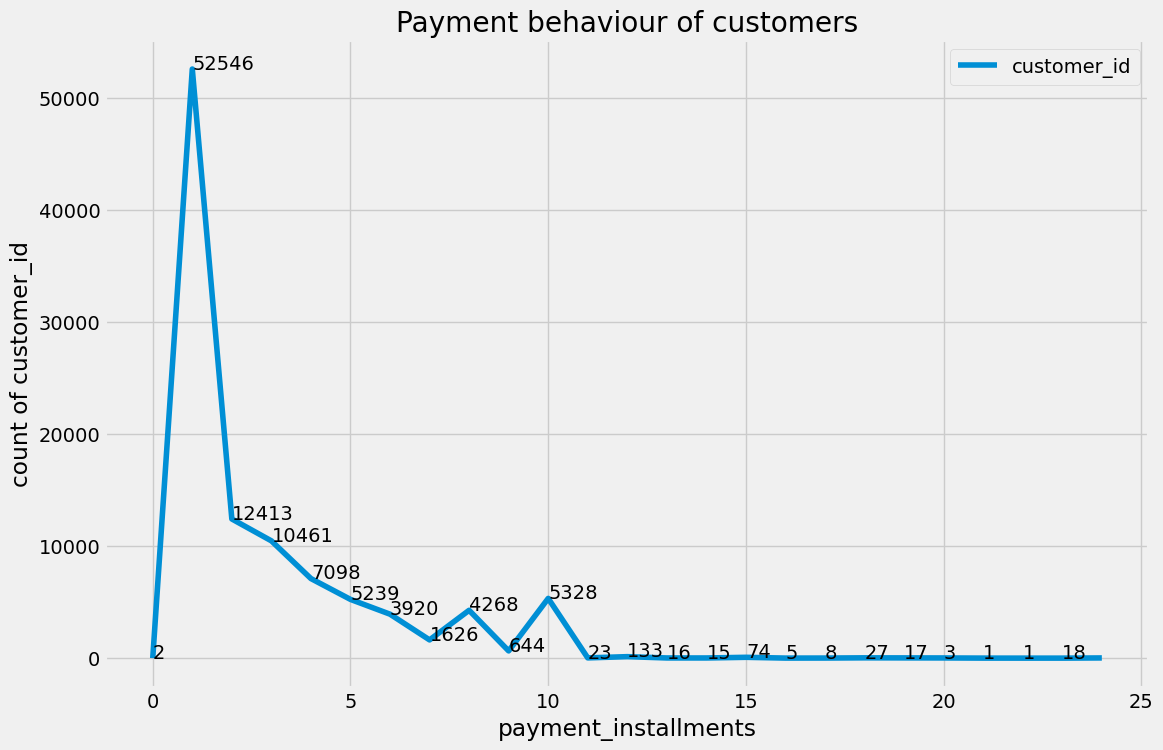

In [53]:
Payment_mode.plot(x='payment_installments',y='customer_id',kind='line',figsize=[12,8])
x=Payment_mode.index
y=Payment_mode['customer_id']
for i,j in zip(x,y):
    plt.text(i,j,str(j))
plt.ylabel('count of customer_id')
plt.title('Payment behaviour of customers')
plt.show()

# b. Which payment channels are used by most customers?

In [121]:
Payment_channel=Payment.groupby('payment_type')[['customer_id']].count().sort_values('customer_id',ascending=False)
Payment_channel=Payment_channel.reset_index()
Payment_channel

,payment_type,customer_id
0,credit_card,76795
1,UPI,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


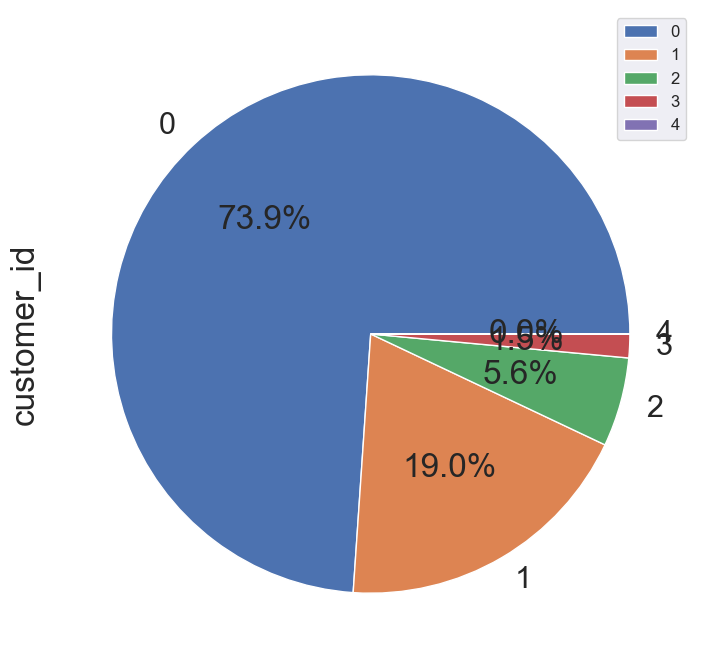

In [154]:

ax=Payment_channel.plot(x='payment_type',y='customer_id',kind='pie',figsize=[15,8],autopct='%1.1f%%')
plt.legend(loc='upper right',fontsize=12)
plt.show()


# 5. Customer satisfaction towards category & product
# a. Which categories (top 10) are maximum rated & minimum rated?


In [53]:
Order_Review_Ratings

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26
...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,12/9/2017 0:00,12/11/2017 20:06
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,3/22/2018 0:00,3/23/2018 9:10
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,7/1/2018 0:00,7/2/2018 12:59
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,12/15/2017 0:00,12/16/2017 1:29


In [54]:
Order_det_prod

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year-Month,order_item_id,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,day,week,time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017-Oct,1,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,Monday,40,10
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:00,8/15/2017 20:05,8/17/2017 15:28,8/18/2017 14:44,8/28/2017 0:00,2017-Aug,1,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,Tuesday,33,18
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:00,8/2/2017 18:43,8/4/2017 17:35,8/7/2017 18:30,8/15/2017 0:00,2017-Aug,1,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,Wednesday,31,18
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:00,10/25/2017 2:14,10/27/2017 16:48,11/7/2017 18:04,11/13/2017 0:00,2017-Oct,1,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,Monday,43,23
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,2018-Jul,1,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,Tuesday,30,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:00,8/10/2017 21:35,8/18/2017 16:42,8/23/2017 15:36,8/31/2017 0:00,2017-Aug,1,...,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0,Thursday,32,21
112646,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:00,8/10/2017 21:35,8/18/2017 16:42,8/23/2017 15:36,8/31/2017 0:00,2017-Aug,2,...,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0,Thursday,32,21
112647,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:00,12/20/2017 10:09,12/20/2017 20:25,1/26/2018 15:45,1/18/2018 0:00,2017-Dec,1,...,34.0,372.0,2.0,300.0,16.0,6.0,12.0,Wednesday,51,9
112648,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00,2017-Mar,1,...,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0,Thursday,10,9


In [55]:
top_cat=pd.merge(Order_det_prod,Order_Review_Ratings,on='order_id',how='inner')
top_cat

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year-Month,order_item_id,...,product_length_cm,product_height_cm,product_width_cm,day,week,time,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017-Oct,1,...,19.0,8.0,13.0,Monday,40,10,a54f0611adc9ed256b57ede6b6eb5114,4,10/11/2017 0:00,10/12/2017 3:43
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:00,8/15/2017 20:05,8/17/2017 15:28,8/18/2017 14:44,8/28/2017 0:00,2017-Aug,1,...,19.0,8.0,13.0,Tuesday,33,18,b46f1e34512b0f4c74a72398b03ca788,4,8/19/2017 0:00,8/20/2017 15:16
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:00,8/2/2017 18:43,8/4/2017 17:35,8/7/2017 18:30,8/15/2017 0:00,2017-Aug,1,...,19.0,8.0,13.0,Wednesday,31,18,dc90f19c2806f1abba9e72ad3c350073,5,8/8/2017 0:00,8/8/2017 23:26
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:00,10/25/2017 2:14,10/27/2017 16:48,11/7/2017 18:04,11/13/2017 0:00,2017-Oct,1,...,19.0,8.0,13.0,Monday,43,23,1bafb430e498b939f258b9c9dbdff9b1,3,11/8/2017 0:00,11/10/2017 19:52
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,2018-Jul,1,...,19.0,13.0,19.0,Tuesday,30,20,8d5266042046a06655c8db133d120ba5,4,8/8/2018 0:00,8/8/2018 18:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113317,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:00,8/10/2017 21:35,8/18/2017 16:42,8/23/2017 15:36,8/31/2017 0:00,2017-Aug,1,...,28.0,23.0,23.0,Thursday,32,21,f5453b3d33358ed459eb4312392b96a8,4,8/24/2017 0:00,8/25/2017 11:38
113318,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:00,8/10/2017 21:35,8/18/2017 16:42,8/23/2017 15:36,8/31/2017 0:00,2017-Aug,2,...,28.0,23.0,23.0,Thursday,32,21,f5453b3d33358ed459eb4312392b96a8,4,8/24/2017 0:00,8/25/2017 11:38
113319,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:00,12/20/2017 10:09,12/20/2017 20:25,1/26/2018 15:45,1/18/2018 0:00,2017-Dec,1,...,16.0,6.0,12.0,Wednesday,51,9,8ea780895f362ce949029f95b7181ff0,1,1/19/2018 0:00,1/21/2018 2:51
113320,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00,2017-Mar,1,...,22.0,13.0,18.0,Thursday,10,9,e262b3f92d1ce917aa412a9406cf61a6,5,3/22/2017 0:00,3/23/2017 11:02


In [56]:
top_10_prod_cat_rating=pd.pivot_table(top_cat,index='product_category_name',values='review_score',aggfunc='mean').sort_values('review_score',ascending=False)
top_10_prod_cat_rating=top_10_prod_cat_rating.head(10).reset_index()
top_10_prod_cat_rating

,product_category_name,review_score
0,Cds_Dvds_Musicals,4.642857
1,Fashion_Childrens_Clothes,4.500000
2,Books_General_Interest,4.439421
3,Books_Imported,4.400000
4,Costruction_Tools_Tools,4.359223
5,Books_Technical,4.338290
6,Luggage_Accessories,4.309524
7,Food_Drink,4.303571
8,Small_Appliances_Home_Oven_And_Coffee,4.302632
9,Fashion_Sport,4.258065


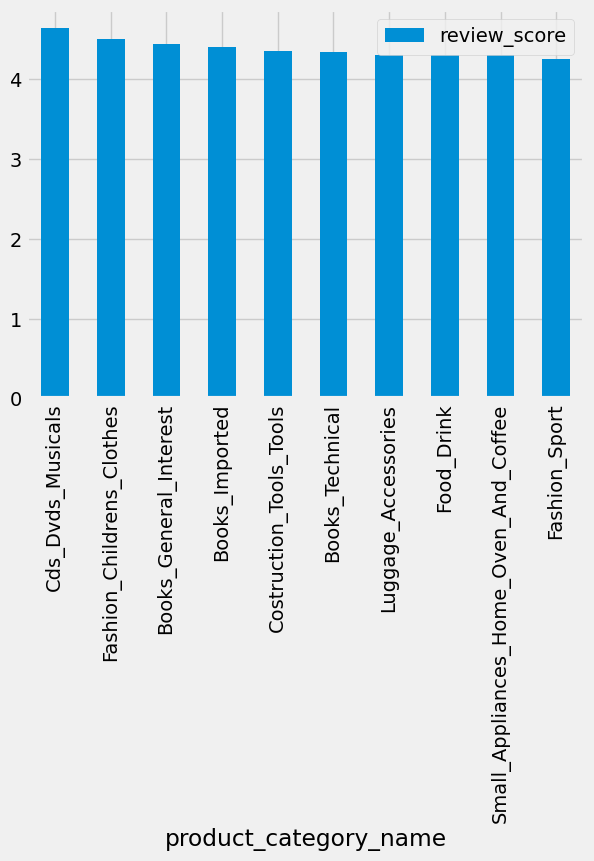

In [60]:
top_10_prod_cat_rating.plot(x='product_category_name',y='review_score',kind='bar')
plt.show()

In [57]:
min_rated=pd.pivot_table(top_cat,index='product_category_name',values='review_score',aggfunc='mean').sort_values('review_score')
min_rated=min_rated.head(10).reset_index()

In [58]:
min_rated

,product_category_name,review_score
0,Security_And_Services,2.500000
1,Diapers_And_Hygiene,3.256410
2,Home_Comfort_2,3.366667
3,Office_Furniture,3.484421
4,Fashion_Male_Clothing,3.621212
5,Fixed_Telephony,3.671698
6,Party_Supplies,3.767442
7,Fashio_Female_Clothing,3.780000
8,La_Cuisine,3.785714
9,Audio,3.808219


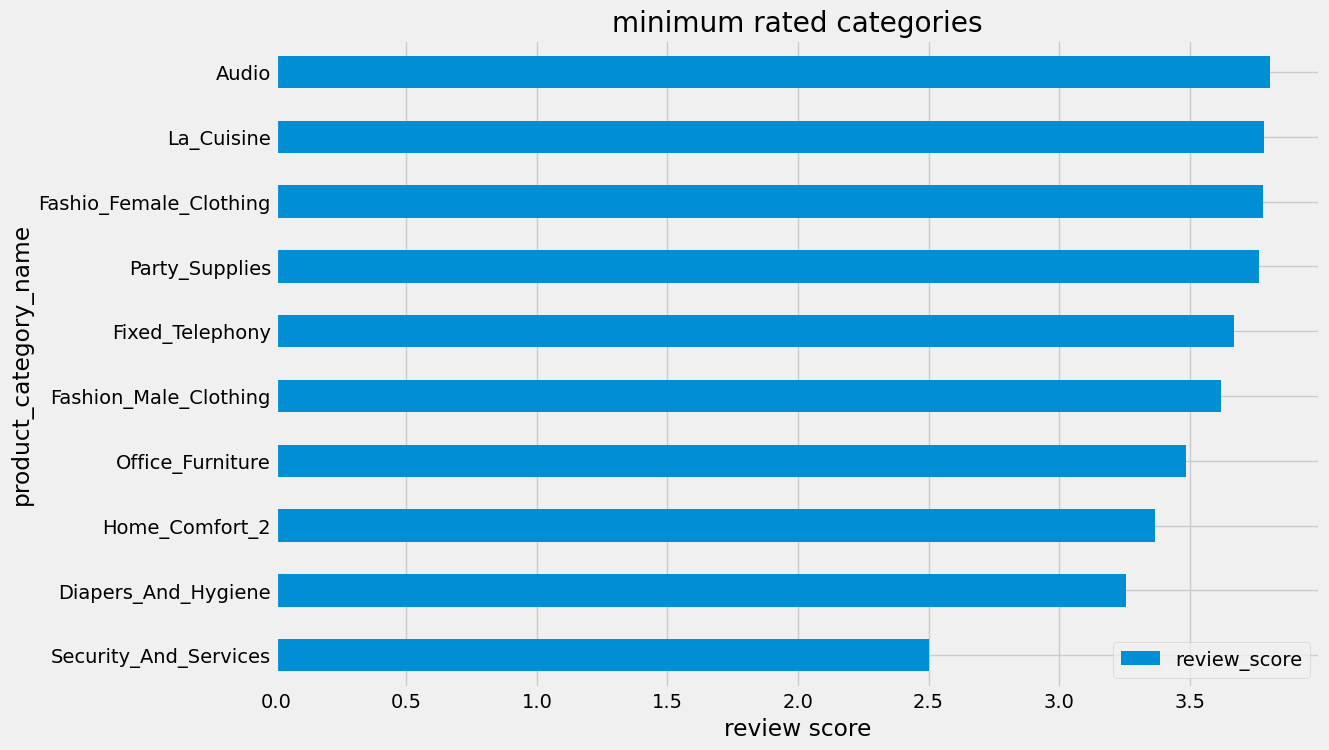

In [63]:
min_rated.plot(x='product_category_name',y='review_score',kind='barh',figsize=[12,8])
plt.xlabel('review score')
plt.title('minimum rated categories')
plt.show()

# b. Which products (top10) are maximum rated & minimum rated?

In [119]:
top_prod=top_cat.groupby('product_id')['review_score'].mean().reset_index().sort_values('review_score',ascending=False)
top_prod.head(10)

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
17330,86743ff92eee3d16b7df59cddd583b8c,5.0
17345,868ceb027ab706a4dee42e2220006b85,5.0
17343,868969d3a93aeeab7bfcd4fc3d3d65de,5.0
17342,868766ed2172644fdd977d6bd395a107,5.0
17340,8684bd8f93b4f4038d07188a23811e93,5.0
17335,867c96d2bb67aba6500a4c509cf76072,5.0
17334,867b820367ec206b38a357f2c12454b7,5.0
17333,867901d7e8488fb97f1fb538c09d476e,5.0
17325,865bfa00c1dad8f4146d3c2765f051ca,5.0


In [60]:
min_rated_prod=top_cat.groupby('product_id')['review_score'].mean().reset_index().sort_values('review_score')
min_rated_prod.head(10)

,product_id,review_score
11572,592cc6634d2c783d297effc0b828bc37,1.0
5376,28c95d7653177449fd4b6fc7adb63ce9,1.0
5378,28d6d6a10ceb0636ae572e7efafef612,1.0
5379,28d7da9ebe96bfda54aed060b68b23a1,1.0
18040,8c4e5e50a08a443b7fbad34ad7587625,1.0
18039,8c4dc358af6e14174f2114be62c18f37,1.0
18034,8c4456c061013adccb1ba4cbce2d0365,1.0
18030,8c35dc99b37ba51780800ba049ed3616,1.0
5409,28fe66c8a81afe9be7829f40a5fae9ee,1.0
30663,ee37349d258101b9d573a256d1401ff7,1.0


# c. Average rating by location, seller, product, category, month etc.

In [62]:
# Average rating by Location
Order_rating1=pd.merge(Orders,Order_Review_Ratings,on='order_id')
Order_rating2=pd.merge(Order_rating1,Customers,on='customer_id')
Order_rating2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year-Month,review_id,review_score,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017-Oct,a54f0611adc9ed256b57ede6b6eb5114,4,10/11/2017 0:00,10/12/2017 3:43,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,2018-Jul,8d5266042046a06655c8db133d120ba5,4,8/8/2018 0:00,8/8/2018 18:37,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,2018-Aug,e73b67b67587f7644d5bd1a52deb1b01,5,8/18/2018 0:00,8/22/2018 19:07,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00,2017-Nov,359d03e676b3c069f62cadba8dd3f6e8,5,12/3/2017 0:00,12/5/2017 19:21,7c142cf63193a1473d2e66489a9ae977,59296,Kartarpur,Punjab
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00,2018-Feb,e50934924e227544ba8246aeb3770dd4,5,2/17/2018 0:00,2/18/2018 13:02,72632f0f9dd73dfee390c9b22eb56dd6,9195,Bheemavaram,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00,2017-Mar,e262b3f92d1ce917aa412a9406cf61a6,5,3/22/2017 0:00,3/23/2017 11:02,6359f309b166b0196dbf7ad2ac62bb5a,12209,Bobbili,Andhra Pradesh
99996,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00,2018-Feb,29bb71b2760d0f876dfa178a76bc4734,4,3/1/2018 0:00,3/2/2018 17:50,da62f9e57a76d978d02ab5362c509660,11722,Mahendragarh,Haryana
99997,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00,2017-Aug,371579771219f6db2d830d50805977bb,5,9/22/2017 0:00,9/22/2017 23:10,737520a9aad80b3fbbdad19b66b37b30,45920,Bidasar,Rajasthan
99998,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,2018-Jan,8ab6855b9fe9b812cd03a480a25058a1,2,1/26/2018 0:00,1/27/2018 9:16,5097a5312c8b157bb7be58ae360ef43c,28685,Banaur,Punjab


In [63]:
Location_rating=Order_rating2.groupby('customer_state')['review_score'].mean().reset_index()

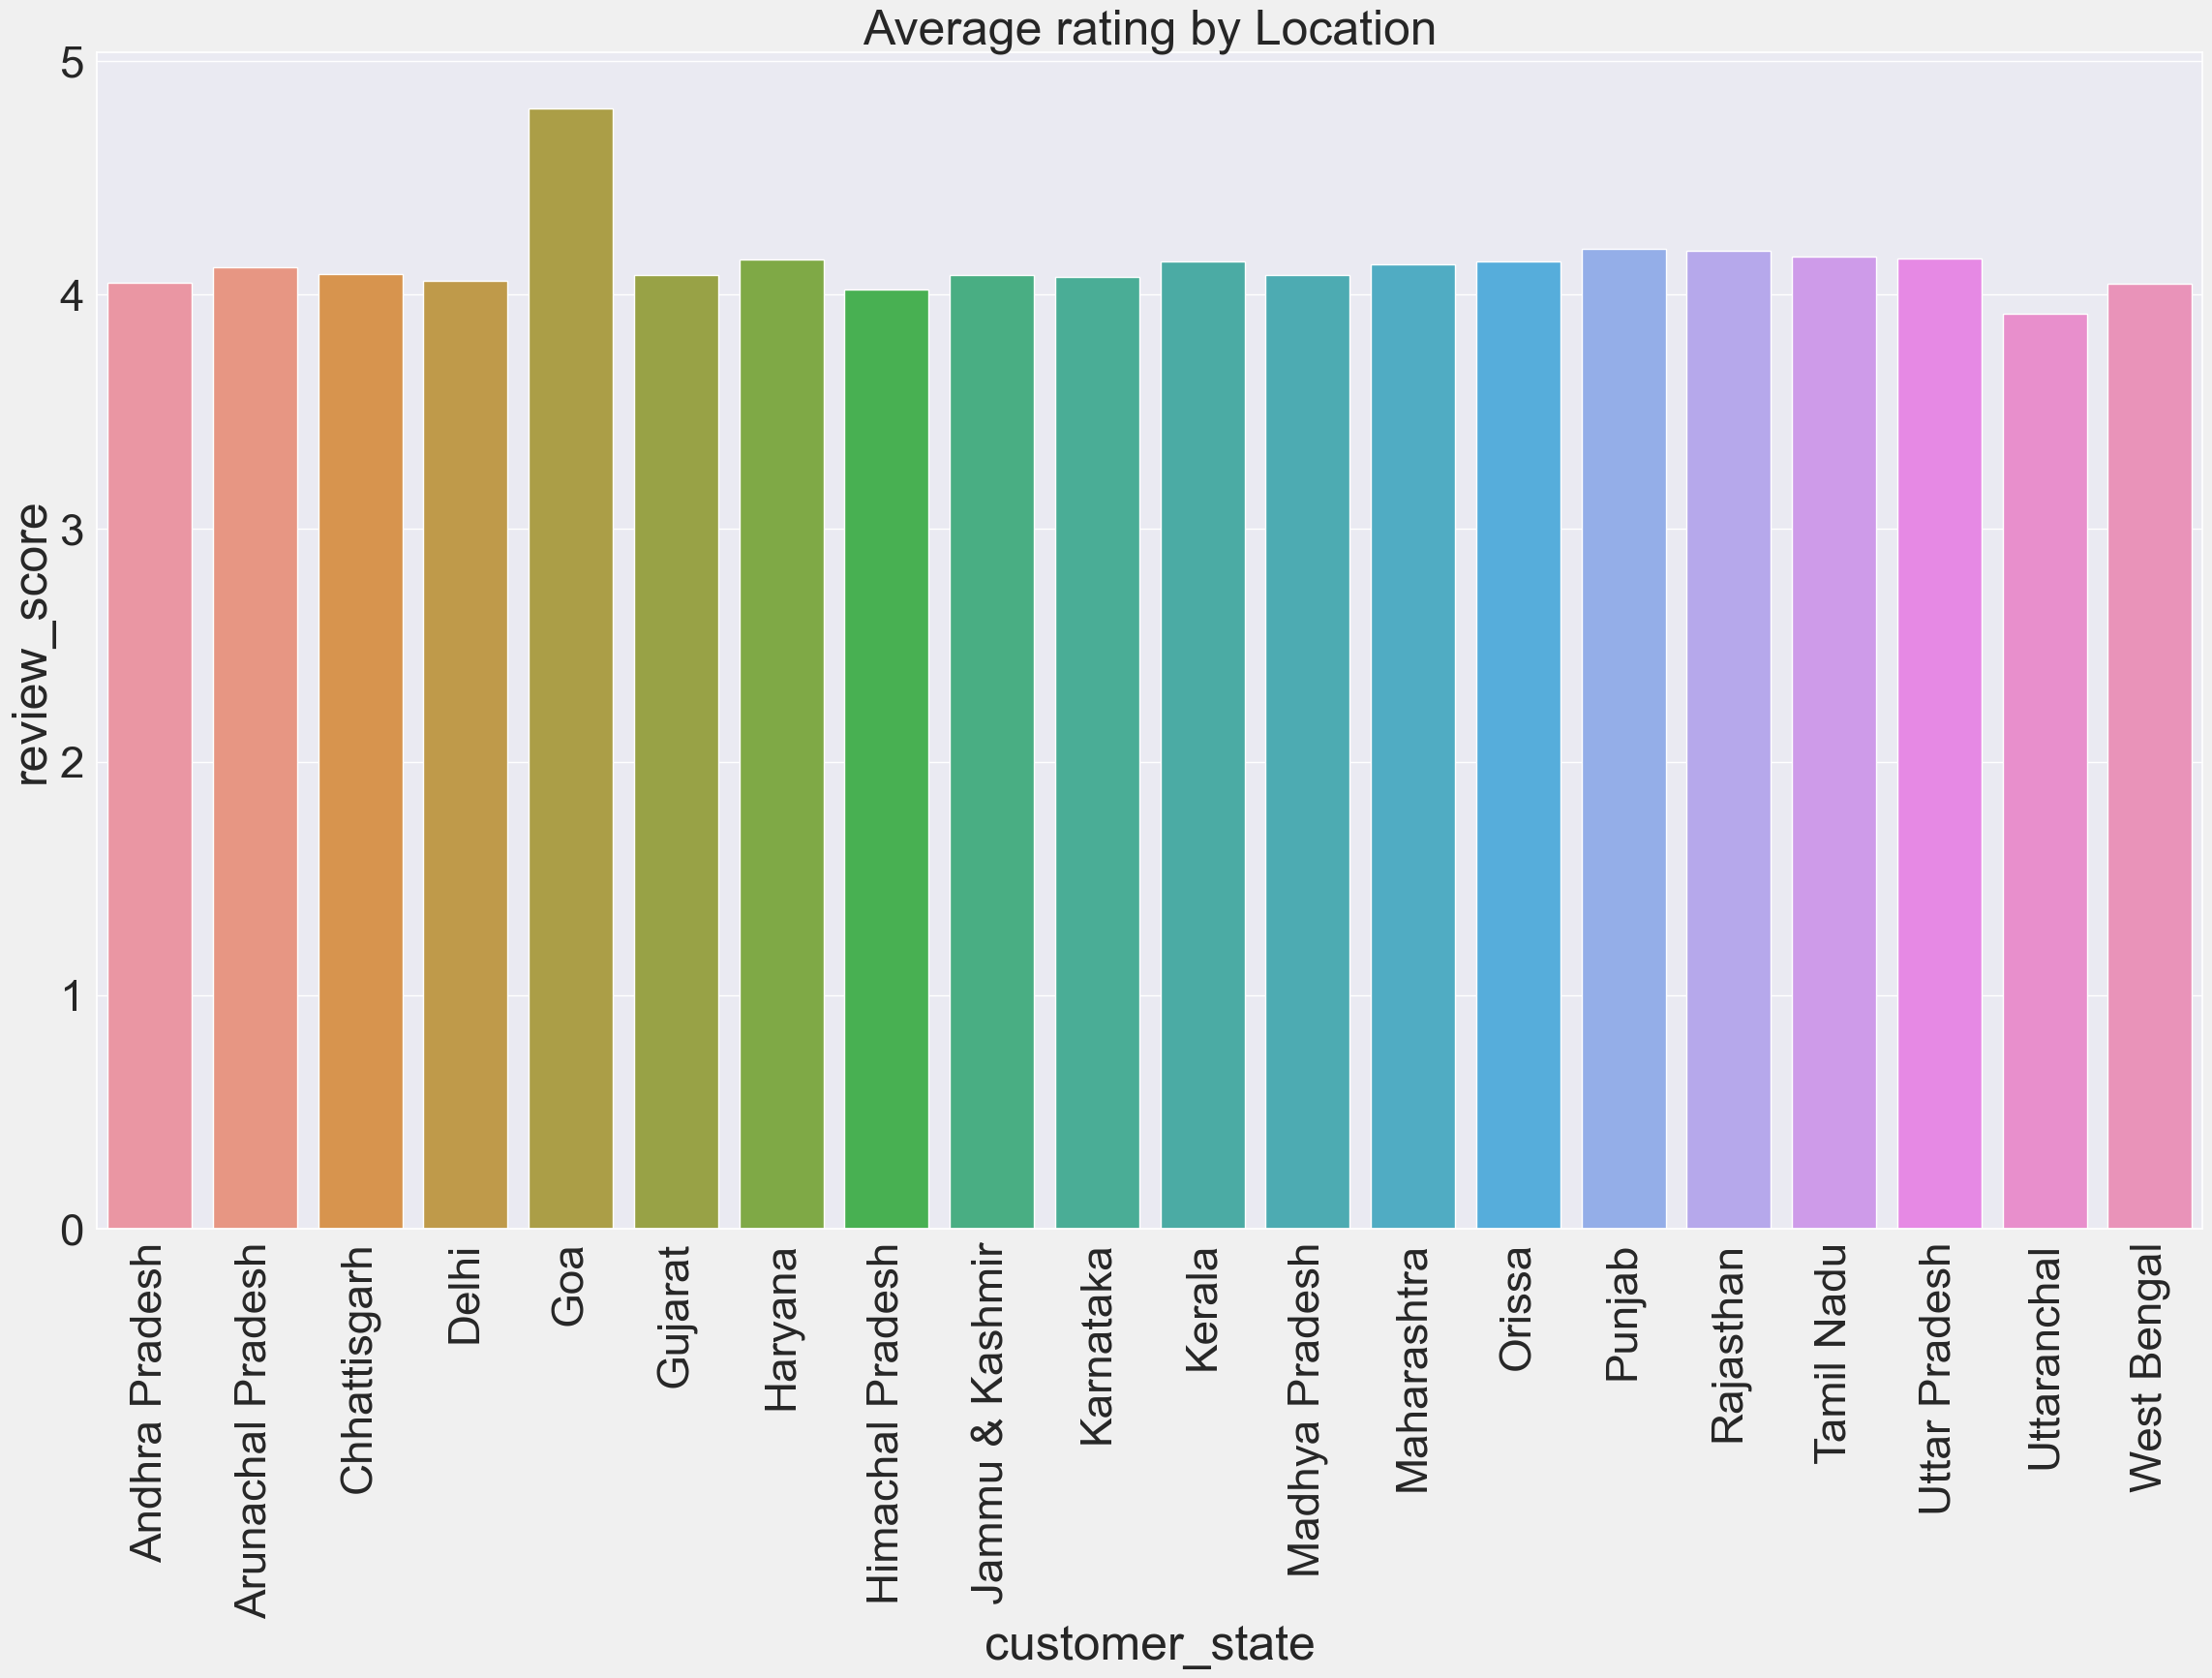

In [6]:
plt.figure(figsize=[25,15])
sns.set_style('whitegrid')
sns.set(font_scale=3)
sns.barplot(x=Location_rating['customer_state'],y=Location_rating['review_score'])
plt.xticks(rotation=90)
plt.title('Average rating by Location')
plt.show()

In [64]:
#average rating by seller
Order_rating3=pd.merge(Order_rating2,Order_Items,on='order_id')
Order_rating3

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year-Month,review_id,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017-Oct,a54f0611adc9ed256b57ede6b6eb5114,...,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,2018-Jul,8d5266042046a06655c8db133d120ba5,...,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,7/30/2018 3:24,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,2018-Aug,e73b67b67587f7644d5bd1a52deb1b01,...,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,8/13/2018 8:55,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00,2017-Nov,359d03e676b3c069f62cadba8dd3f6e8,...,7c142cf63193a1473d2e66489a9ae977,59296,Kartarpur,Punjab,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,11/23/2017 19:45,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00,2018-Feb,e50934924e227544ba8246aeb3770dd4,...,72632f0f9dd73dfee390c9b22eb56dd6,9195,Bheemavaram,Andhra Pradesh,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2/19/2018 20:31,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113317,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00,2018-Feb,29bb71b2760d0f876dfa178a76bc4734,...,da62f9e57a76d978d02ab5362c509660,11722,Mahendragarh,Haryana,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2/12/2018 13:10,174.90,20.10
113318,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00,2017-Aug,371579771219f6db2d830d50805977bb,...,737520a9aad80b3fbbdad19b66b37b30,45920,Bidasar,Rajasthan,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,9/5/2017 15:04,205.99,65.02
113319,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,2018-Jan,8ab6855b9fe9b812cd03a480a25058a1,...,5097a5312c8b157bb7be58ae360ef43c,28685,Banaur,Punjab,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,1/12/2018 21:36,179.99,40.59
113320,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,2018-Jan,8ab6855b9fe9b812cd03a480a25058a1,...,5097a5312c8b157bb7be58ae360ef43c,28685,Banaur,Punjab,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,1/12/2018 21:36,179.99,40.59


In [65]:
Seller_ratings=Order_rating3.groupby('seller_id')['review_score'].mean().reset_index().sort_values('review_score',ascending=False)
Seller_ratings

,seller_id,review_score
2335,c18309219e789960add0b2255ca4b091,5.0
2407,c7246702dc991a06d788120dc7544391,5.0
2837,eaaa46e98c9e61f6764dd1d7a2ab8b3e,5.0
841,466222e777149751370e7e98fb623b0c,5.0
2835,ea846a0e7ad98a741783e886d89dfa44,5.0
...,...,...
2661,dc120d932ddf9d4dfb6fd68beefda622,1.0
1438,749e7cdabbaf72f16677859e27874ba5,1.0
2645,dadc51ef321949ec9a3ab25cd902e23d,1.0
2638,da2782c804606d2a5d8e1760dbb3e7ec,1.0


In [66]:
#Average rating by Month

In [73]:
Order_detail.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'Year-Month', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'Month'],
      dtype='object')

In [81]:
Order_det_join_Order_rating=pd.merge(Order_detail,Order_Review_Ratings,on='order_id')
Month_ratings=pd.pivot_table(Order_det_join_Order_rating,index='Month',values='review_score',aggfunc='mean').reset_index()

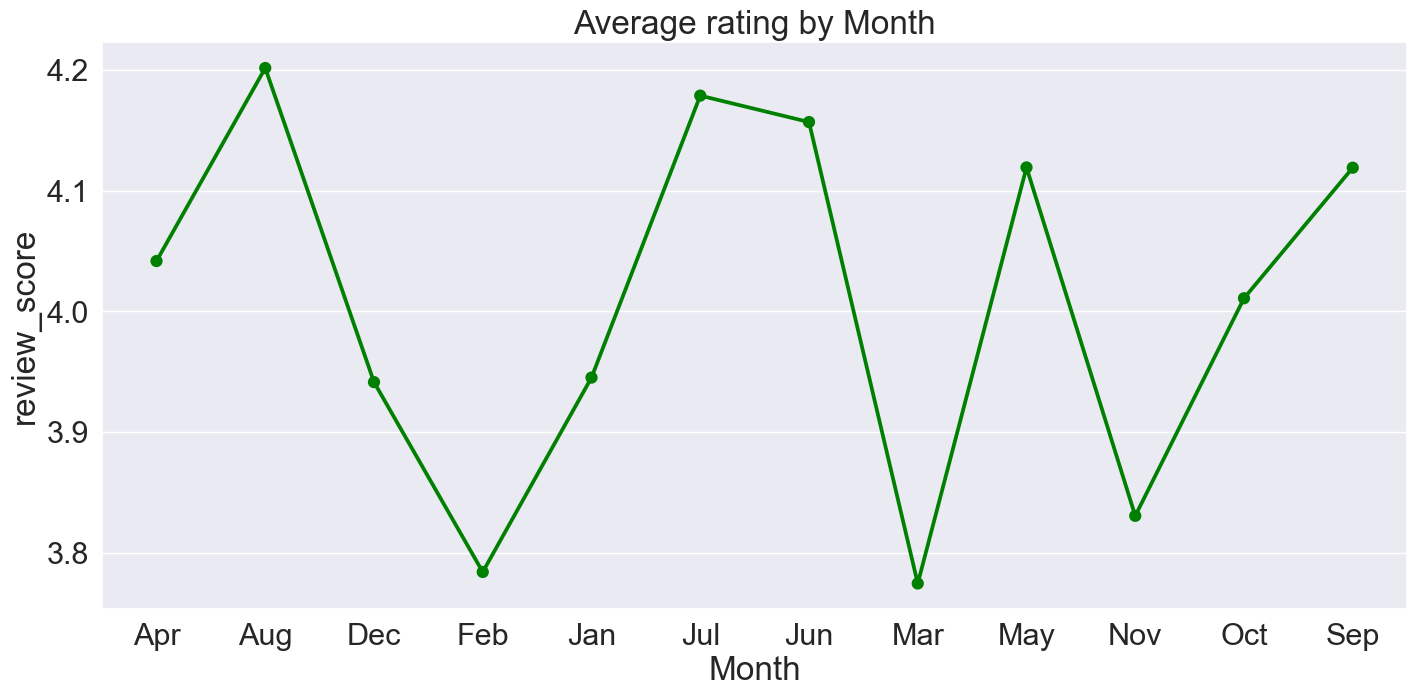

In [115]:
plt.figure(figsize=[15,7])
sns.set_style(style='darkgrid')
sns.set(font_scale=2)
sns.pointplot(data=Month_ratings,x='Month',y='review_score',color='green')
plt.title('Average rating by Month')
plt.show()